## Project Description

MLB Advanced Media, as stated in a job description for which I was intrigued by, was looking to develop insights into predictability of a hit based on data acquired through their Statcast tool. Statcast is a high-speed, high-accuracy device that tracks ball and player movements. 

The findings of this task would be for use by analysts and commentators during game broadcasts. The problem statement for the specfic prediction I undertook is:

Based on the ballistics of the pitch and the ball hit into play, what is the likelihood it results in a hit.

## Notebook Description

3\. Perform **EDA** to understand the data more deeply


- Read pickled data into a Pandas DataFrame
- `.describe()` to view basic statistics of the data set
- Visualizations
    - `sns.pairplot`
    - `plt.hist` with KDE line, mean, and median plotted
    - `violinplot`
    - `sns.heatmap` to show correlation between features
    - Bar plots on counts for categorical features, split by hit / no hit

___________

### Initialize packages and read in pickled data

In [1]:
% run __init__.py

In [2]:
cd ..

/home/jovyan


In [3]:
df_in_play = pd.read_pickle('data/in_play.p')

In [4]:
df_in_play.shape

(127052, 18)

In [5]:
df_in_play.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127052 entries, 434378-8 to 621056-1
Data columns (total 18 columns):
player_id       127052 non-null int64
pitch           127052 non-null object
mph             127052 non-null float64
ev_mph          127052 non-null float64
pitcher         127052 non-null object
batter          127052 non-null object
dist            127052 non-null int64
spin_rate       127052 non-null int64
launch_angle    127052 non-null float64
zone            127052 non-null object
game_date       127052 non-null object
ab_count        127052 non-null object
inning          127052 non-null object
pitch_result    127052 non-null object
ab_result       127052 non-null object
full_pitch      127052 non-null object
pitch_rollup    127052 non-null object
hit_flag        127052 non-null bool
dtypes: bool(1), float64(3), int64(3), object(11)
memory usage: 17.6+ MB


In [6]:
df_in_play.columns

Index(['player_id', 'pitch', 'mph', 'ev_mph', 'pitcher', 'batter', 'dist',
       'spin_rate', 'launch_angle', 'zone', 'game_date', 'ab_count', 'inning',
       'pitch_result', 'ab_result', 'full_pitch', 'pitch_rollup', 'hit_flag'],
      dtype='object')

### Statistics view of data using `.describe()`

In [6]:
df_in_play_stats = df_in_play.describe().T

In [7]:
df_in_play_stats.drop(['player_id'], axis=0, inplace=True)

In [8]:
df_in_play_stats

,count,mean,std,min,25%,50%,75%,max
mph,127052.0,88.816898,5.825538,36.400,84.900,90.200,93.2000,103.20
ev_mph,127052.0,86.637634,15.153937,0.000,79.900,89.100,97.9000,122.20
dist,127052.0,153.049767,139.895645,0.000,9.000,130.000,283.0000,495.00
spin_rate,127052.0,2145.965487,438.706581,88.000,2039.000,2210.000,2373.0000,3666.00
launch_angle,127052.0,11.122158,27.557570,-84.987,-8.428,11.389,29.1635,89.85


### `seaborn.pairplot()` to view relationships between numerical features by two classes (hit / no hit)

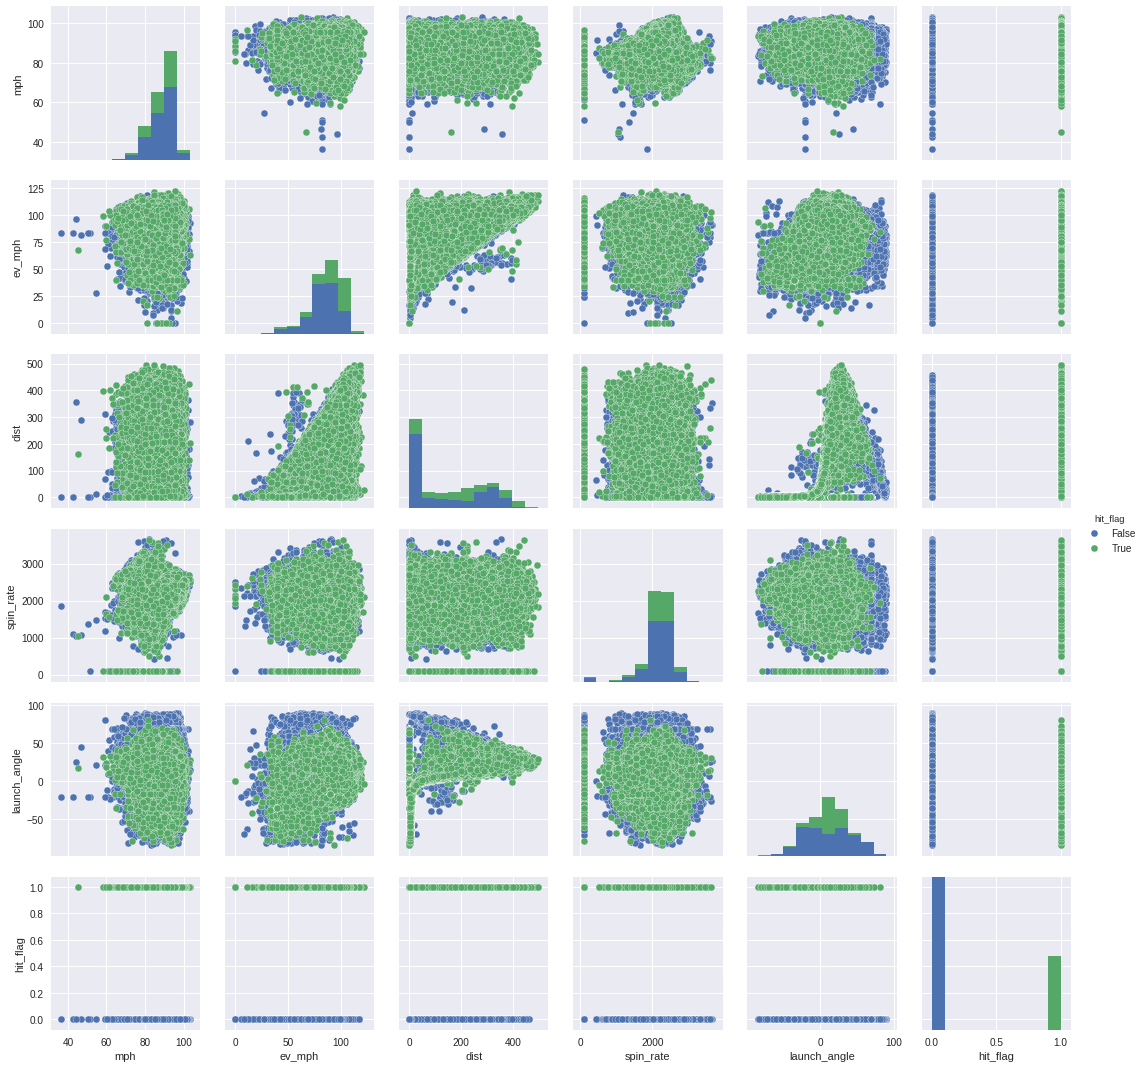

In [6]:
# plt.figure(figsize=(10,10))
# sns.pairplot(df_in_play.drop('player_id', axis=1), hue='hit_flag')
# plt.show()

### Distribution plots of numerical features with kde line, mean lines, and median lines plotted

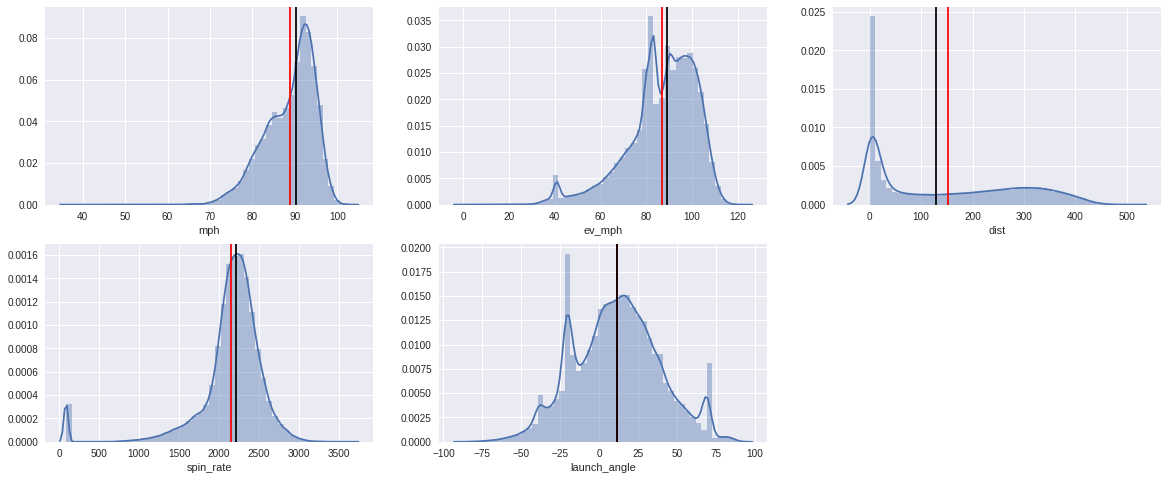

In [9]:
fig = plt.figure(figsize=(20,8))

for i, num_col in enumerate(df_in_play_stats.index):
    fig.add_subplot(2,3,1+i)
    sns.distplot(df_in_play[num_col])
    
    mean_value = df_in_play[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = df_in_play[num_col].median()
    plt.axvline(median_value, c='black')

### `violin_plot` to show distributions by class (hit / no hit)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


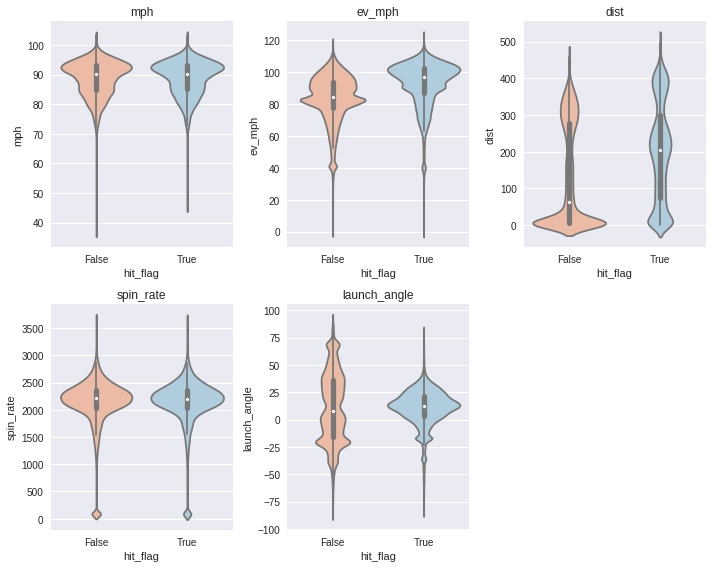

In [27]:
fig = plt.figure(figsize=(10,8))

for i, col in enumerate(num_features_index):
    fig.add_subplot(2,3,1+i)
    sns.violinplot(x='hit_flag', y=col, data=df_in_play, palette='RdBu')
    plt.xlabel('hit_flag')
    plt.ylabel(col)
    plt.title(col)
    
fig.tight_layout()
fig.show()

### `heatmap` to show correlation across features

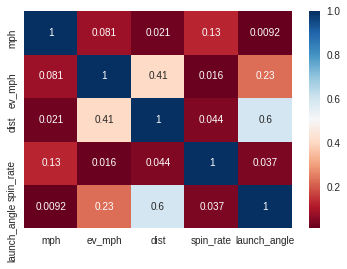

In [41]:
df_in_play_corr = df_in_play[num_features_index].corr()
sns.heatmap(df_in_play_corr, cmap='RdBu', annot=True)

### Bar plots for categorical features by two classes (hit / no hit)

In [10]:
df_in_play.hit_flag.value_counts()

False    85593
True     41459
Name: hit_flag, dtype: int64

In [11]:
cat_features = df_in_play.select_dtypes(include=['category'])
cat_features_index = df_in_play.columns
num_features_index = df_in_play_stats.index

In [12]:
cat_features_list = [col for col in df_in_play.columns 
                     if col not in num_features_index]
cat_features_list = cat_features_list[1:]
cat_features_list

['pitch',
 'pitcher',
 'batter',
 'zone',
 'game_date',
 'ab_count',
 'inning',
 'pitch_result',
 'ab_result',
 'full_pitch',
 'pitch_rollup',
 'hit_flag']

**`zone` plot**

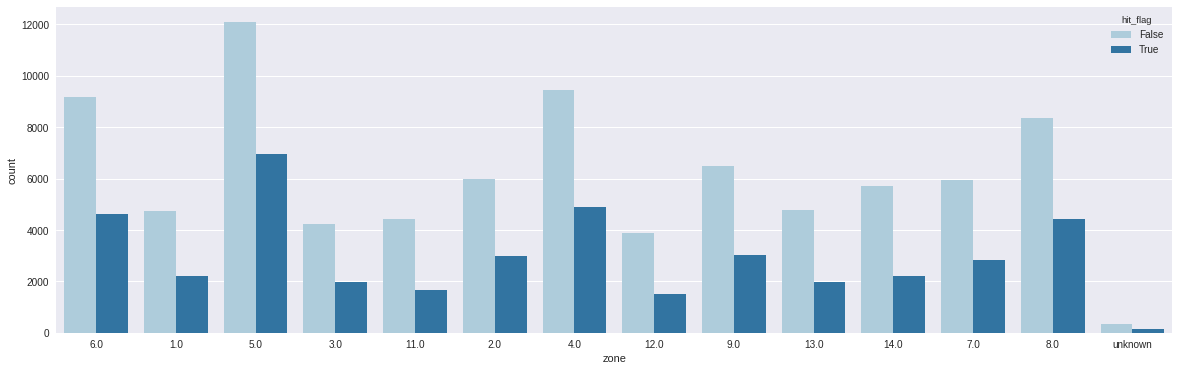

In [34]:
fig = plt.figure(figsize=(20,6))
sns.countplot('zone', hue='hit_flag', data=df_in_play, palette='Paired')

**`ab_count` plot**

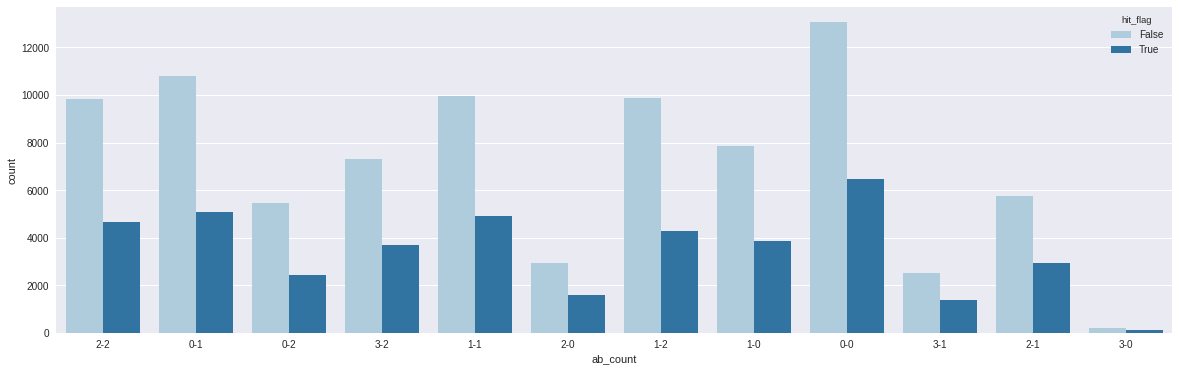

In [35]:
fig = plt.figure(figsize=(20,6))
sns.countplot('ab_count', hue='hit_flag', data=df_in_play, palette='Paired')

**`inning` plot**

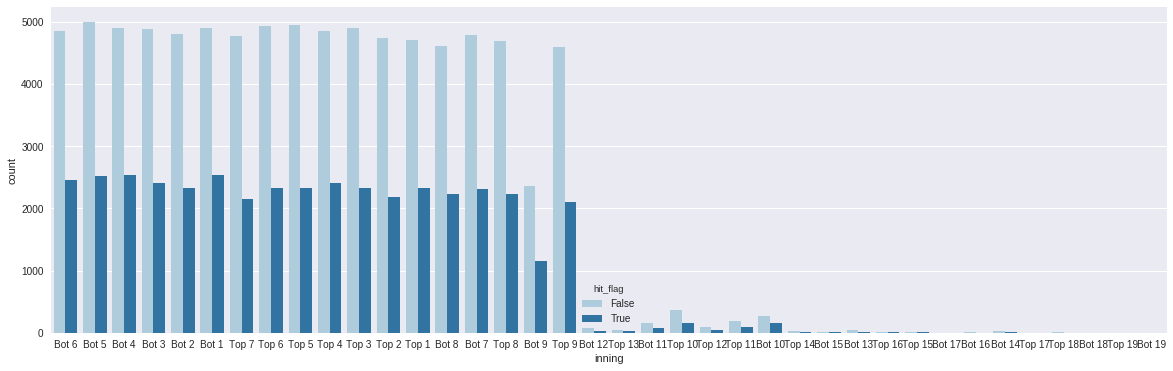

In [36]:
fig = plt.figure(figsize=(20,6))
sns.countplot('inning', hue='hit_flag', data=df_in_play, palette='Paired')

**`pitch_result` plot**

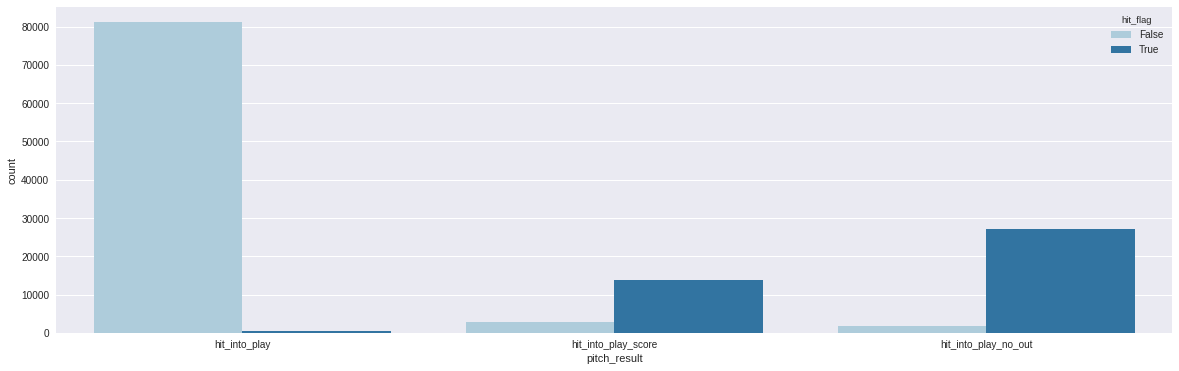

In [37]:
fig = plt.figure(figsize=(20,6))
sns.countplot('pitch_result', hue='hit_flag', data=df_in_play, palette='Paired')

**`full_pitch` plot**

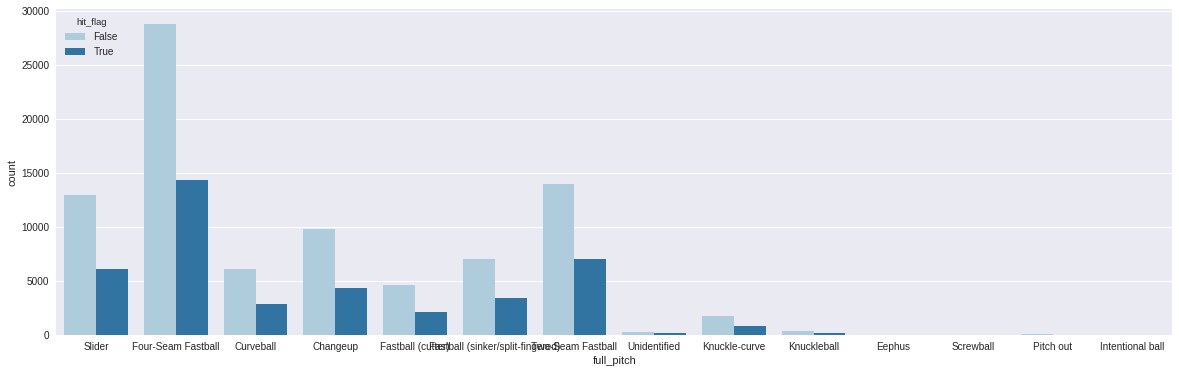

In [38]:
fig = plt.figure(figsize=(20,6))
sns.countplot('full_pitch', hue='hit_flag', data=df_in_play, palette='Paired')

**`pitch_rollup` plot**

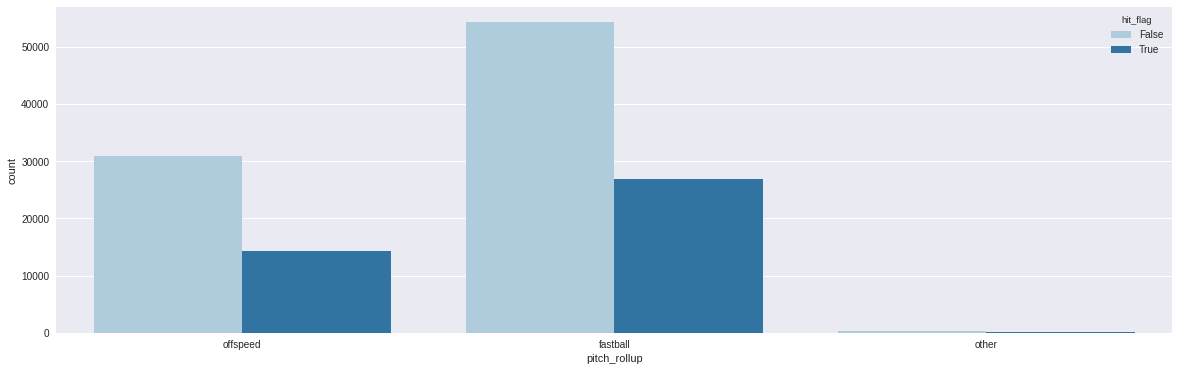

In [39]:
fig = plt.figure(figsize=(20,6))
sns.countplot('pitch_rollup', hue='hit_flag', data=df_in_play, palette='Paired')